### Author - Vibuthi Seniya
### Reviewed by -
### Date -

In [ ]:
#importing
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt



Reused from code reuse session - 1

In [ ]:
# reading the csv
data_frame = pd.read_csv('/content/classified_data_final.csv')

In [ ]:
data_frame.head()

,Unnamed: 0,Patient_ID,Grade,A_Stage,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,0,A0012,3,1,4.0,24.0,1,60,0
1,1,A0013,2,1,35.0,14.0,5,62,0
2,2,A0014,2,1,63.0,14.0,7,75,0
3,3,A0015,3,1,18.0,2.0,1,84,0
4,4,A0016,3,1,41.0,3.0,1,50,0


Reused from code reuse session - 1

In [ ]:
#finding the categorical values in Mortality status
data_frame['Mortality_Status'].unique()

array([0, 1])

In [ ]:
X = data_frame[['Grade','A_Stage','Tumor_Size','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']]
y = data_frame['Mortality_Status']

In [ ]:
X.shape

(4007, 6)

Reused from code reuse session - 1

In [ ]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Reused from code reuse session - 2

In [ ]:
#Train the model 1
class_1 = LogisticRegression()
class_1.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = class_1.predict(X_test)

In [ ]:
#print the accuracy score for model 1
print(accuracy_score(y_test,y_pred))

0.8965087281795511


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       679
           1       0.81      0.42      0.56       123

    accuracy                           0.90       802
   macro avg       0.86      0.70      0.75       802
weighted avg       0.89      0.90      0.88       802



Reused from code reuse session - 2

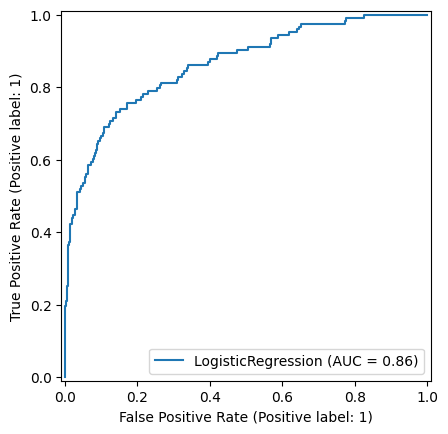

In [ ]:
curve_1 = RocCurveDisplay.from_estimator(class_1,X_test,y_test)


Reused from Tutorial Week 2

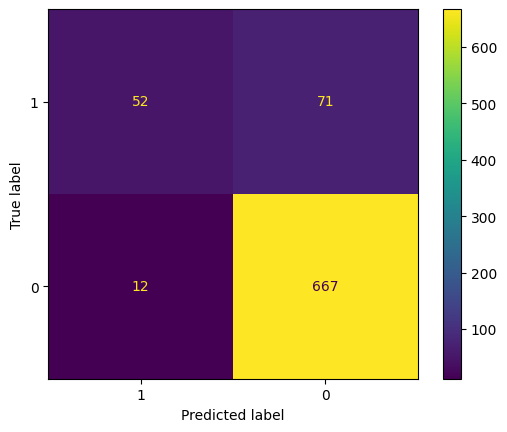

In [ ]:
class_1_cm = confusion_matrix(y_test,y_pred,labels=[1,0])
dis_class_1_cm = ConfusionMatrixDisplay(class_1_cm,display_labels=[1,0])
dis_class_1_cm.plot()
plt.show()

Reused from week 4 tutorial - page 8

In [ ]:
# Traning the model 2 KNN
class_2 = KNeighborsClassifier(n_neighbors=5)
class_2.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_2 = class_2.predict(X_test)

In [ ]:
# printing the classification report fr KNn
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       679
           1       0.78      0.49      0.60       123

    accuracy                           0.90       802
   macro avg       0.85      0.73      0.77       802
weighted avg       0.89      0.90      0.89       802



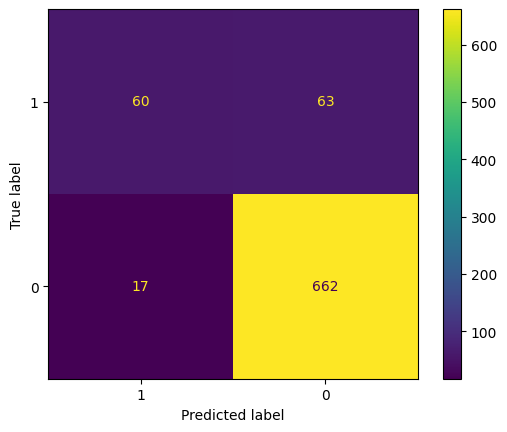

In [ ]:
class_2_cm = confusion_matrix(y_test,y_pred_2,labels=[1,0])
dis_class_2_cm = ConfusionMatrixDisplay(class_2_cm,display_labels=[1,0])
dis_class_2_cm.plot()
plt.show()

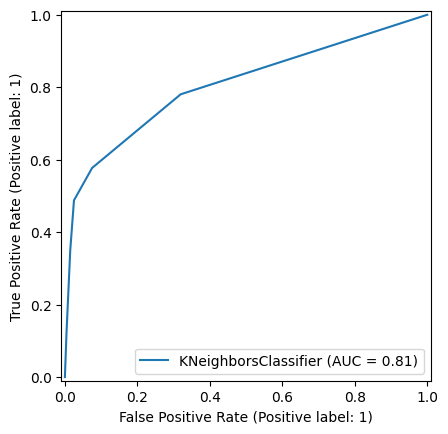

In [ ]:
curve_2 = RocCurveDisplay.from_estimator(class_2,X_test,y_test)

In [ ]:
print(accuracy_score(y_test,y_pred_2))

0.9002493765586035


Reused from week 4 tutorial - page 13

In [ ]:
#Traning the model Naive bayes
class_3 = BernoulliNB()
class_3.fit(X_train,y_train)

BernoulliNB()

In [ ]:
y_pred_3 = class_3.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       679
           1       0.00      0.00      0.00       123

    accuracy                           0.85       802
   macro avg       0.42      0.50      0.46       802
weighted avg       0.72      0.85      0.78       802



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reused from code reuse session 2

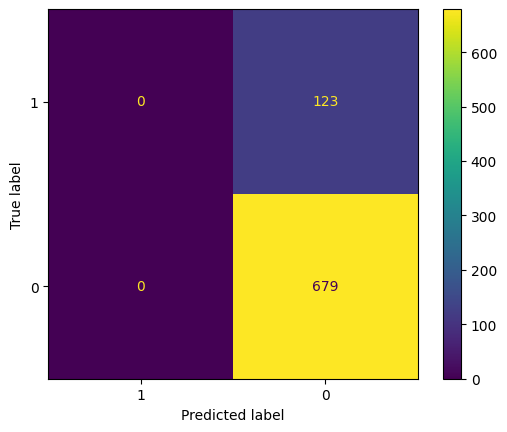

In [ ]:
class_3_cm = confusion_matrix(y_test,y_pred_3,labels=[1,0])
dis_class_3_cm = ConfusionMatrixDisplay(class_3_cm,display_labels=[1,0])
dis_class_3_cm.plot()
plt.show()

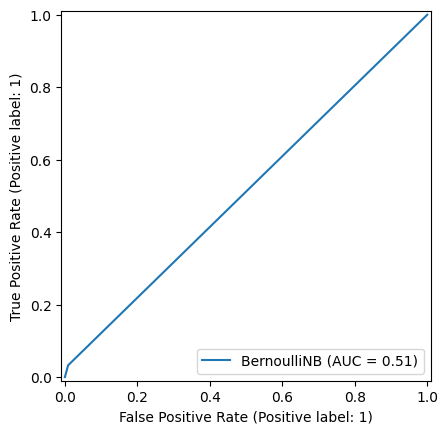

In [ ]:
curve_3 = RocCurveDisplay.from_estimator(class_3,X_test,y_test)

In [ ]:
print(accuracy_score(y_test,y_pred_3))

0.8466334164588528


from above models KNN has the best accuracy so tunning its hyperparametrs

Reused from week 4 tutorial - page 9,10

Text(0, 0.5, 'Mean Error')

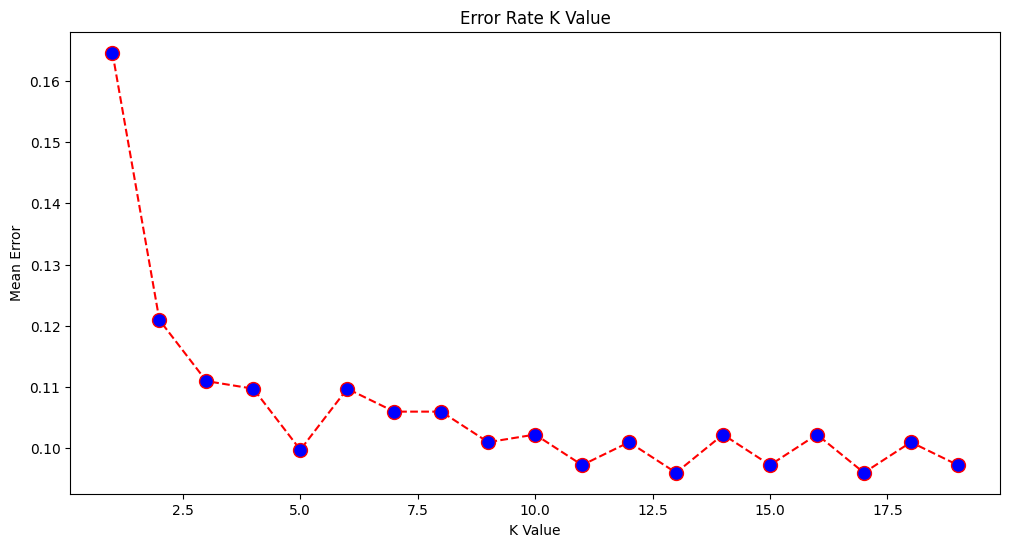

In [ ]:
# finding the best K value
error=[]
for i in range(1,20):
  class_2 = KNeighborsClassifier(n_neighbors=i)
  class_2.fit(X_train,y_train)
  yo_pred_2 = class_2.predict(X_test)
  error.append(np.mean(yo_pred_2 != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



In [ ]:
# Traning the best model wwith the best params(13)
class_4 = KNeighborsClassifier(n_neighbors=13)
class_4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred_4 = class_4.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_4))

0.9039900249376559


Reused from week 4 tutorial - page 12

In [ ]:
# Finding the best hyperparameter and training
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

Reused from week 4 tutorial - page 12

In [ ]:
class_5 = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
class_5.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

Reused from week 4 tutorial - page 12

In [ ]:
# best params for the KNN
knn_cv.best_params_

{'metric': 'euclidean', 'n_neighbors': np.int64(10)}

In [ ]:
y_pred_5 = class_5.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_5))

0.8977556109725686


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

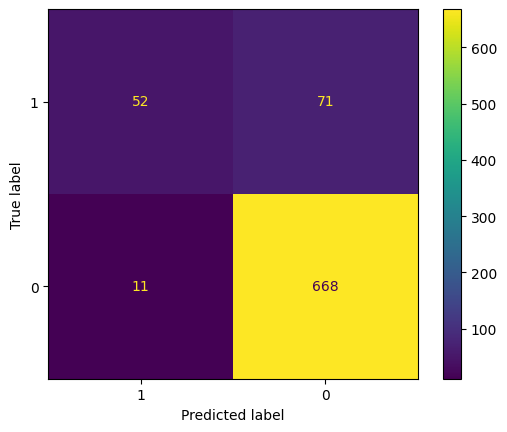

In [ ]:
class_5_cm = confusion_matrix(y_test,y_pred_5,labels=[1,0])
dis_class_5_cm = ConfusionMatrixDisplay(class_5_cm,display_labels=[1,0])
dis_class_5_cm.plot()
plt

In [ ]:
print(classification_report(y_test,y_pred_5))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       679
           1       0.83      0.42      0.56       123

    accuracy                           0.90       802
   macro avg       0.86      0.70      0.75       802
weighted avg       0.89      0.90      0.88       802

